In [1]:
import sys
import os

# modify syspath directory to sys.path

package_path = os.path.abspath(os.path.join('..','core'))
if package_path not in sys.path:
    sys.path.append(package_path)

package_path = os.path.abspath(os.path.join('..','utils'))
if package_path not in sys.path:
    sys.path.append(package_path)

package_path = os.path.abspath(os.path.join('..'))
if package_path not in sys.path:
    sys.path.append(package_path)

import numpy as np
import qutip as qt
import math
import matplotlib.pyplot as plt

from IPython.display import HTML # both needed to disply gifs
from PIL import Image

# Import modules from the package
from core import create_hamiltonian as ch
from core import create_state as cs
from core import time_evo
from core import time_evo_new
from core import load_outputs
from core import load_outputs_3
from core.schmidt_solve import compute_schmidt_states_all_time
from core.eigen_ener_states import eigen_ener_states as eig
from utils.entropy import compute_VN, plot_VN, compute_VN_time
from utils import collapse_gif
from utils.collapse_gif import collapse_gif
from utils.display_gif import display_gif
from utils.distribution_gif import gif_distribution_eig_total
from utils.plot import plot_basic
from utils.plot import plot_with_binning
from utils.basic_functions import state_distribution_eig_tot
from utils.overlap import overlap
from utils.overlap import gif_schmidt_overlap
from utils.interference import interference_plot
from utils.expectations import exp_val_time
from utils.plot_hamiltonians import plot_hamiltonians


In [20]:
d1=10;d2=100;E_s=1; E_s2=0; E_int_s=0.25; E_int_e=0.7;E_int_s2=0;E_int_e2=0; E_e=0.7; E_e2=0;w=[0,0,0,0,0,1,0,0,0,0];envi=[0]; tmax= 100; ind_nb = 100;log=1
file_name="test.txt" #Remember to make it .txt!!!
# Running the simulation and running the core functions

result, tlist, H_list, ket_list, info = time_evo_new(d1,d2,E_s,E_s2,E_int_s,E_int_e,E_int_s2,E_int_e2,E_e,E_e2,w,envi,tmax,ind_nb,log,file_name)
eigen = eig(H_list)



In [28]:
def load_outputs(file_name):
    """
    Load the results saved in a file by the `time_evo_new` function.
    
    Args:
        file_name (str): path to the output file.
        
    Returns:
        d1, d2, E_s, E_s2, E_int_s, E_int_e, E_int_s2, E_int_e2, E_e, E_e2, w, envi, tmax, ind_nb, log, tlist, result, H_list, state_list, info_list: variables recovered from the file.
    """
    with open(file_name, "r") as f:
        lines = f.readlines()
    
    # Extract parameters
    params = {}
    for line in lines[1:12]:
        param, value = line.split(" = ")
        params[param.strip()] = eval(value.strip())
    
    # Extract results
    results = {}
    for line in lines[13:]:
        key, value = line.split(" = ")
        results[key.strip()] = eval(value.strip())
    
    # Recover variables
    d1, d2, E_s, E_s2, E_int_s, E_int_e, E_int_s2, E_int_e2, E_e, E_e2, w, envi, tmax, ind_nb, log, tlist = params.values()
    result, H_list, state_list, info_list = results.values()
    
    return d1, d2, E_s, E_s2, E_int_s, E_int_e, E_int_s2, E_int_e2, E_e, E_e2, w, envi, tmax, ind_nb, log, tlist, result, H_list, state_list, info_list

In [33]:
with open(file_name, "r") as f:
    print(file_name)
    lines = f.readlines()
    print(lines)
print(f)


test.txt
['Parameters taken by the function:\n', 'd1 = 10\n', 'd2 = 200\n', 'E_s = 1\n', 'E_s2 = 0\n', 'E_int_s = 0.25\n', 'E_int_e = 0.7\n', 'E_int_s2 = 0\n', 'E_int_e2 = 0\n', 'E_e = 0.7\n', 'E_e2 = 0\n', 'w = [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]\n', 'envi = [0]\n', 'tmax = 100\n', 'ind_nb = 100\n', 'log = 1\n', 'file_name = outputs/simulation_results.txt\n', 'H_list = (2000, Quantum object: dims = [[10, 200], [10, 200]], shape = (2000, 2000), type = oper, isherm = True\n', 'Qobj data =\n', '[[-0.30566137+0.j         -0.55272627+0.13035776j  0.08981478-0.04174386j\n', '  ...  0.        +0.j          0.        +0.j\n', '   0.        +0.j        ]\n', ' [-0.55272627-0.13035776j  0.54320373+0.j          0.06314843+0.24673946j\n', '  ...  0.        +0.j          0.        +0.j\n', '   0.        +0.j        ]\n', ' [ 0.08981478+0.04174386j  0.06314843-0.24673946j -0.64919557+0.j\n', '  ...  0.        +0.j          0.        +0.j\n', '   0.        +0.j        ]\n', ' ...\n', ' [ 0.        +0.j  

In [ ]:
# Extract parameters
params = {}
for line in lines[1:12]:
    param, value = line.split(" = ")
    params[param.strip()] = eval(value.strip())
    
# Extract results
results = {}
print(lines[13:])
for line in lines[13:]:
    key, value = line.split(" = ")
    print(key)
    print(value)
    #results[key.strip()] = eval(value.strip())

In [14]:
d1, d2, E_s, E_s2, E_int_s, E_int_e, E_int_s2, E_int_e2, E_e, E_e2, w, envi, tmax, ind_nb, log, tlist, result, H_list, state_list, info_list = load_outputs(file_name)

NameError: name 'outputs' is not defined

In [11]:
f = open("outputs/simulation_results/test.txt", "r")
print(f.read())

Parameters taken by the function:
d1 = 10
d2 = 100
E_s = 1
E_s2 = 0
E_int_s = 0.25
E_int_e = 0.7
E_int_s2 = 0
E_int_e2 = 0
E_e = 0.7
E_e2 = 0
w = [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
envi = [0]
tmax = 100
ind_nb = 100
log = 1
file_name = test.txt
H_list = (1000, Quantum object: dims = [[10, 100], [10, 100]], shape = (1000, 1000), type = oper, isherm = True
Qobj data =
[[-0.62313775+0.j          0.14547555+0.19447482j  0.30373316-0.19856308j
  ...  0.        +0.j          0.        +0.j
   0.        +0.j        ]
 [ 0.14547555-0.19447482j  0.50806324+0.j          0.2652554 +0.12593186j
  ...  0.        +0.j          0.        +0.j
   0.        +0.j        ]
 [ 0.30373316+0.19856308j  0.2652554 -0.12593186j -0.34774091+0.j
  ...  0.        +0.j          0.        +0.j
   0.        +0.j        ]
 ...
 [ 0.        +0.j          0.        +0.j          0.        +0.j
  ...  9.40734591+0.j         -0.30043376+0.1957465j
   0.09591108+0.01035731j]
 [ 0.        +0.j          0.        +0.j          

SyntaxError: invalid syntax (<string>, line 1)

/Users/maringirard/Dev/ACL/utils/entropy.py:10: RuntimeWarning: divide by zero encountered in log2
  entropy = -np.sum(np.nan_to_num(np.log2(np.linalg.eigvals(density_matrix.full())) * np.linalg.eigvals(density_matrix.full())))
/Users/maringirard/Dev/ACL/utils/entropy.py:10: RuntimeWarning: invalid value encountered in multiply
  entropy = -np.sum(np.nan_to_num(np.log2(np.linalg.eigvals(density_matrix.full())) * np.linalg.eigvals(density_matrix.full())))
/usr/local/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


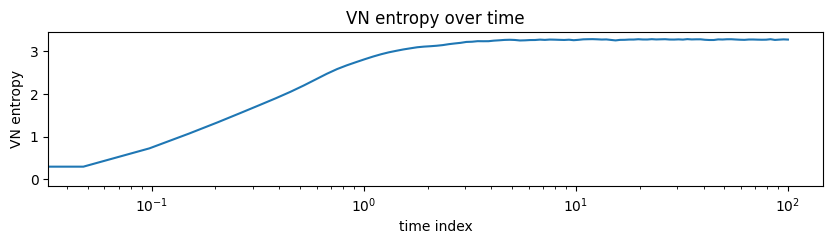

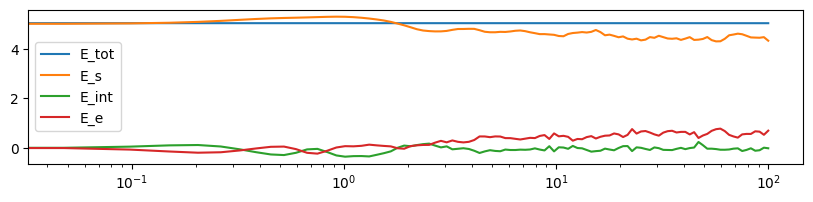

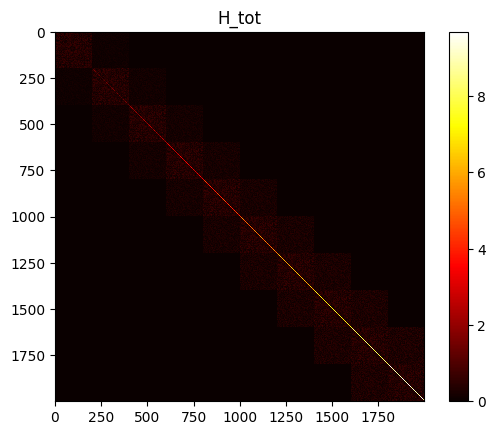

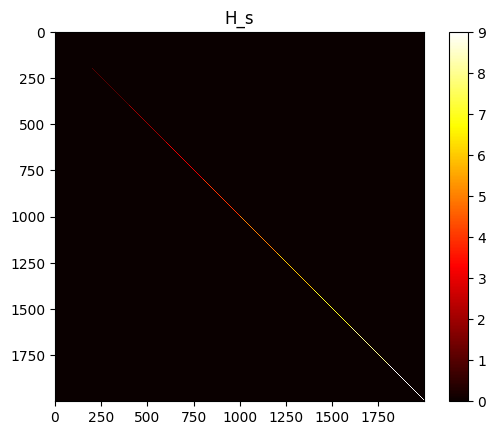

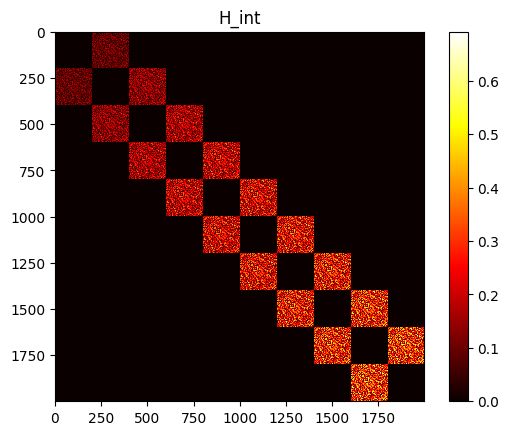

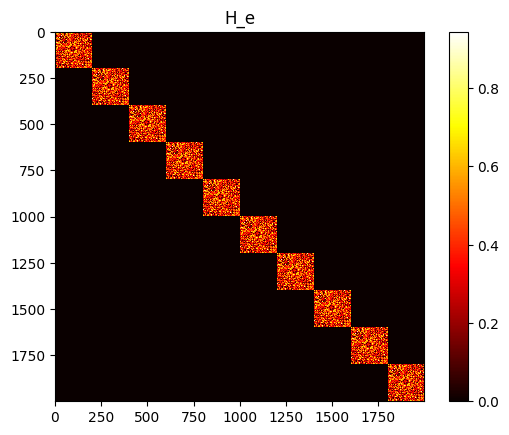

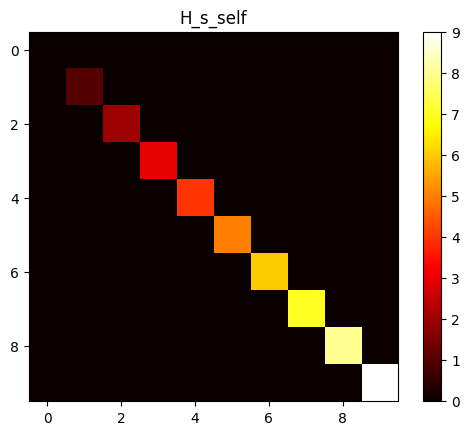

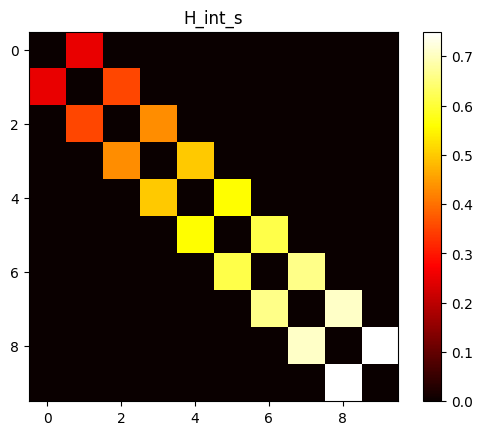

In [3]:
plot_VN(result,info[15],1)
plt.show()
[E_tot,E_s,E_int,E_e]=exp_val_time(result, H_list, info)
plt.figure(figsize=(10, 2))
plt.plot(tlist,E_tot)
plt.plot(tlist,E_s)
plt.plot(tlist,E_int)
plt.plot(tlist,E_e)
plt.xscale("log")
plt.legend(["E_tot","E_s","E_int","E_e"])
plt.show()

plot_hamiltonians(H_list)